# Jupyter Integration



Datapane has first-class Jupyter Notebook support. This includes Jupyter Lab, Jupyter Notebook, Google Colab, and Visual Studio Code with the Jupyter plugin.

Let's see how Datapane and Jupyter Notebook can build data-powered apps, all without disrupting your workflow.

In [1]:
import datapane as dp
import altair as alt
from vega_datasets import data

## Notebook to Data App? One line of code.

Data analysis often begins in a Jupyter Notebook, and once complete, we need to share our insights.

Some recipients may be comfortable with an `.ipynb` file, and in those instances, you could just send your notebook over and still benefit from Datapane's enhancements.

But in most cases, you will want to turn your notebook into something presentable and accessible. With Datapane, all it takes is a single line of code.

```python
app = dp.App(blocks=dp.cells_to_blocks(Out))
```

Datapane will automatically detect your cells and convert them to Datapane blocks.


![Iris analysis to app](img/jupyter/iris-analysis.png)


!!! warning
    Don't forget to save your notebook before calling `cells_to_blocks`.

From here, you can save your shareable app locally.

```python
app.save("my_app.html")
```

Or upload it to Datapane Cloud and get a [shareable link](https://cloud.datapane.com/reports/0kzdJR3/my-app/).

```python
app.upload("My App")
```

### Opt-in or opt-out

By default, notebook-to-app conversion will include all markdown and supported cell output. This is the easiest and quickest way to turn your notebook into an app. 

In this mode, you can explicitly exclude cells with the cell tag `dp-exclude`. 

![Exclude cells](img/jupyter/exclude.png)

In some cases, it is preferable to only include cells of interest. This can be achieved by setting `opt_out` to `False`, e.g.:

```python
app = dp.App(blocks=dp.cells_to_blocks(Out, opt_out=False))
```

In this mode, you can explicitly include supported cells with the cell tag `dp-include`.

![Include cells](img/jupyter/include.png)

### Display input code

You may want to display the input code for a particular cell in your app. Datapane has you covered. You can include code cells with the cell tag `dp-show-code`.

![Show code](img/jupyter/show-code.png)

Let's do this for the cell below:

In [2]:
dp.Embed(url='https://www.youtube.com/watch?v=_KS_yZBI71s&t')

## Supercharge your notebook with Datapane

Datapane Blocks are powerful - and they can be embedded straight into your notebook.

### Interactive DataFrames

The notebook journey often begins by loading in a dataset and displaying it for a quick sanity check. Something like the following:


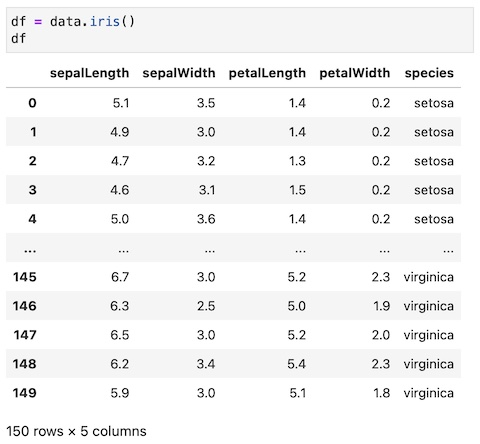

In [3]:
dp.Media(file="img/jupyter/dataframe-output.png", name="dataframe-output", caption="Default DataFrame output behaviour")

That's not bad, but it could be much better. Let's wrap our DataFrame in Datapane's `dp.DataTable` block and see what happens.

In [4]:
df = data.iris()
dp.DataTable(df)

Our DataFrame is now interactive. We can explore it with filters, sorting, export options, and even run SQL queries against the data.

### Better structure with Tabs

Notebooks don't have to be a flood of in/out cells that are viewed from top to bottom. We can add depth to our notebooks with tabs.

Let's create a scatter plot with our dataset from earlier...

In [5]:
fig = (
    alt.Chart(df)
    .mark_point()
    .encode(x="petalLength:Q", y="petalWidth:Q", color="species:N")
)

... and bring them both together with a `dp.Select` block.

In [6]:
dp.Select(
    blocks =[
        dp.Plot(fig, label="Plot"),
        dp.DataTable(df, label="Data")
    ]
)

Now we have an interactive plot, and we can switch to that same interactive data explorer from earlier by clicking the "Data" tab.

### Check out the Blocks Catalog

Enhance your data apps with Datapane's [catalog of blocks](https://docs.datapane.com/catalogs/blocks/), which includes the handy `dp.BigNumber` block.

In [7]:
dp.Group(
    dp.BigNumber(
        heading="Percentage points",
        value="84%",
        change="2%",
        is_upward_change=True,
    ),
    dp.BigNumber(
        heading="Points",
        value="1234",
        change="200",
        is_upward_change=False,
    ),
    columns=2,
)

## Next steps

There's much more we can do with Datapane:

- [Check out our tutorials](/tutorials/)
- Browse the [Blocks](/catalogs/blocks) and [Templates](/catalogs/templates) catalogs
- [Explore our community spaces](https://datapane.com/community)
- [We're open-source – browse the Datapane repo](https://github.com/datapane/datapane)
